In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Load data from CSV file
data = pd.read_csv("all_combined.csv")

In [4]:
X = data['content'].tolist()
data['label'] = data['score'].apply(lambda x: 0 if x < 3 else 1)
y = data['label'].tolist()

In [16]:
# Preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Removing special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    # stemmer = PorterStemmer()
    # tokens = [stemmer.stem(token) for token in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [17]:
# Preprocess all reviews
X_preprocessed = [preprocess_text(review) for review in X]

In [18]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_preprocessed)
X_tokenized = tokenizer.texts_to_sequences(X_preprocessed)

In [19]:
# Pad sequences to ensure uniform length
max_len = max(len(x) for x in X_tokenized)
X_padded = pad_sequences(X_tokenized, maxlen=max_len)

In [20]:
X_padded = np.array(X_padded)
y = np.array(y)

In [21]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [22]:
# Define the model architecture
model = Sequential()
model.add(Embedding(5000, 256, input_length=max_len))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2)

Epoch 1/20
15/15 - 11s - loss: 0.6665 - accuracy: 0.6136 - val_loss: 0.6314 - val_accuracy: 0.7113 - 11s/epoch - 714ms/step
Epoch 2/20
15/15 - 7s - loss: 0.5972 - accuracy: 0.6963 - val_loss: 0.5154 - val_accuracy: 0.7448 - 7s/epoch - 437ms/step
Epoch 3/20
15/15 - 7s - loss: 0.4432 - accuracy: 0.7874 - val_loss: 0.4391 - val_accuracy: 0.8033 - 7s/epoch - 470ms/step
Epoch 4/20
15/15 - 7s - loss: 0.2656 - accuracy: 0.8932 - val_loss: 0.4714 - val_accuracy: 0.8201 - 7s/epoch - 473ms/step
Epoch 5/20
15/15 - 6s - loss: 0.2072 - accuracy: 0.9414 - val_loss: 0.4360 - val_accuracy: 0.8661 - 6s/epoch - 418ms/step
Epoch 6/20
15/15 - 7s - loss: 0.1373 - accuracy: 0.9581 - val_loss: 0.4581 - val_accuracy: 0.8745 - 7s/epoch - 459ms/step
Epoch 7/20
15/15 - 6s - loss: 0.1184 - accuracy: 0.9707 - val_loss: 0.4601 - val_accuracy: 0.8368 - 6s/epoch - 389ms/step
Epoch 8/20
15/15 - 7s - loss: 0.0977 - accuracy: 0.9696 - val_loss: 0.4832 - val_accuracy: 0.8285 - 7s/epoch - 439ms/step
Epoch 9/20
15/15 - 6s 

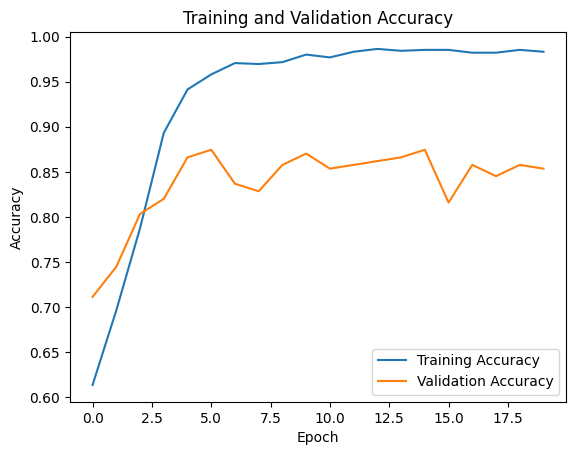

In [24]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

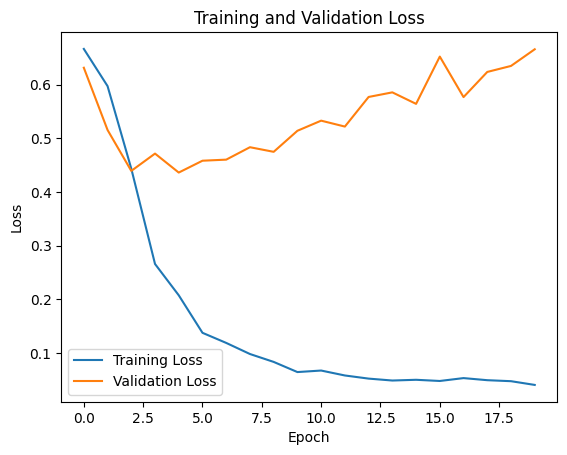

In [25]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()